# Data transformation and exploratory data analysis (EDA)
## From "Exercises in DT and EDA.ipynb" February 5, 2025 
### Exercise 3
(use venv_requirements.txt)

Do an exploratory data analysis of the adult dataset. The cell below loads the dataset from UCI Machine Learning Repository into a pandas dataframe called `adult_data`. It requires that you have installed the package `ucimlrepo`. (Otherwise the dataset is on model for this class.)

You need to explain what the data is about, which variables the dataset contains and what their data type is. 
Moreover, for each individual variable you should investigate/explain its distribution/variation through visualization and descriptive statistics. 
Finally, you should investigate/explain the variation/correlation between pairs of
variables – here it is enough to investigate three pairs of variables, one where both
variables are categorical, one where both variables are numeric, and one where one of the
variable is categorical and the other is numeric.


In [1]:
from matplotlib import pyplot as plt
import seaborn as sns 
import pandas as pd

adult  = pd.read_csv('C:\\Users\\Hassan\\Desktop\\Data and Things\\code\\Data_and_Things_W2025_Exercises\\data\\adult.csv')

adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


### What type of variation occurs within my variables?

Numeric:
*  "age","fnlwgt"

Categorical:
* "workclass","education", "education-num", "marital-status", "occupation",
* "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", 
* "native-country", "income"

### What sort of data is it?
The data contains around 48k rows of American census data with 15 columns, including the target `income`. <br>
There are null values in  `workclass`, `occupation` and `native-country`.


### What is our purpose?
Perform exploratory analysis and investigation of the dataset, explain variation and correlation between pairs of variables. 

### Exploratory visualization
Here I create a lot of visualizations and descriptive stats based on whether the columns are categorical or numerical.
Through these we learn things about the data, such as:
* There are records where the value in columns `occupations` and  `hours-per-week` is meerly "?".
* `fnlwgt` has a lot of outliers.
* N/A values in `workclass`, `occupation` and `native-country`.
* `sex` shows a overrepresentation of males, `marital-status` shows majority is married, workclass has an abundance of people working in the private sector. -> majority of our data consist of privately employed married men.
* Outliers in `capital-gains` and `capital-loss`

<br>
<br>



* ### education

The descriptive stats display the Mode for Edcuation column is Highscool at around 15k - making them highschool educated individuals the most common. Followed by college at 10k.

* ### work-class
As previously mentioned, most people work, and do so in the private sector. So much so, that it heavily disturbs the scale. We could remove the private sector from the dataframe and replot it to get a more informative visualization of the distribution.

* ### marital-status
Also touched upon previously, married with civilian spouses are the most common, followed by never married.

* ### occupation
Mode here is Prof-specialty with 6,172. We can see the ? category indicating the need for data cleaning.

* ### race
Mode here is White with 39,451 entries, which outnumber the second most frequent race by ~35092.

* ### relationship
Mode is husband. Uncertain what this represents as the options are 'Husband', 'not-in-family', 'own-child', 'wife', 'other relative' and 'Unmarried'.

Seems to be that it counts different types relationships and this creates uncertainty in what exatcly this column is supposed to represent.



* ### Age

The histogram displays a rightsscrewed distrubtion, indicating a larger subset of people are younger rather than old.
The mean and median are close at respectively 38,5 and 37 years.
Variance: The spread ranges from 17-90.'
Outliers: There are larger "chunks" of people at specific ages, which to me implies some errors in the data. Could be that this data is an accumulation of data where there also was bins for age, since removed.   

* ### fnlwgt
The final weight has a large spread and significant outliers seen in the descriptive stats and the boxplot, indicating a wide range of values. Per the histogram the high left leaning skew is visible. 

* ### education-num
The spead for education-num reflects the column education with high propensity in high school level with a smaller bump at college years.

* ### capital-gain:
Most individuals report no capital gain. Few outliers with very high capital gains. Would be more telling if we removed the ones not reporting capital gain to get a better visual at the distribution.

* ### capital-loss:
Same as for capital-gain. Few outliers with big losses. Mostly all zeros. removing these would be helpful for better visualization.

* ### hours-per-week 
The majority of individuals work around 40 hours per week, with some variation. Removing the biggest pool (40) would give insight in to how the spread is otherwise.


* ### native-country 

* ### income 
The mode for the income is <=50K, but the data is deceptive/erronious. The 4 categories `<=50K`, `<=50K.`, `<50K.` `<50K`can be consolidated into two groups -> `<=50K.` and `<50K.`.

Seems the issue stems from two seperate ways of keeping track of the same data, perhaps another indication this dataset is a combination of two seperate datasets.
Regardless it is easy to see even if those two were combined the mode would still be <=50K.



In [2]:
cat_col = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "sex", "native-country", "income"]
num_col = ["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week"]

def run_numerical_descriptive_stats(column_name):
    print(f'Descriptive stats for: {column_name} \n {adult[column_name].describe()}')   
    return

def run_categorical_descriptive_stats(column_name):
    print(adult[column_name].value_counts())
    print(f'\nMode: {adult[column_name].mode()[0]}\n')
    return

Descriptive stats for: age 
 count    48842.000000
mean        38.643585
std         13.710510
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64


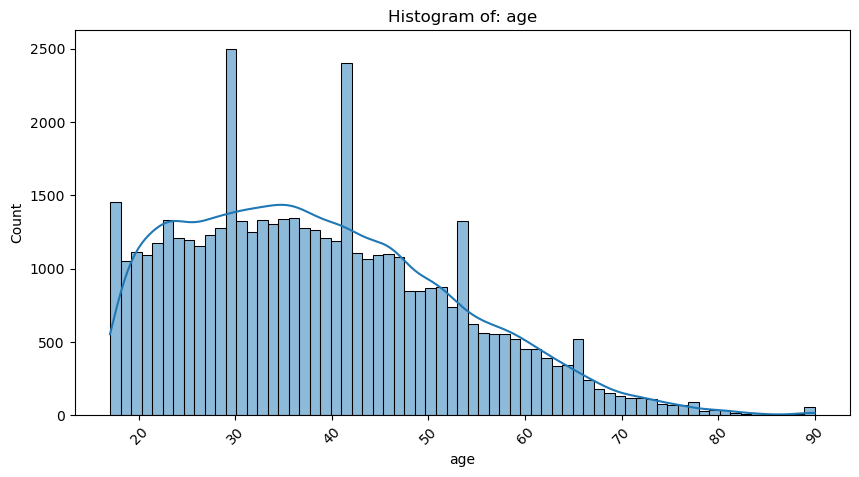

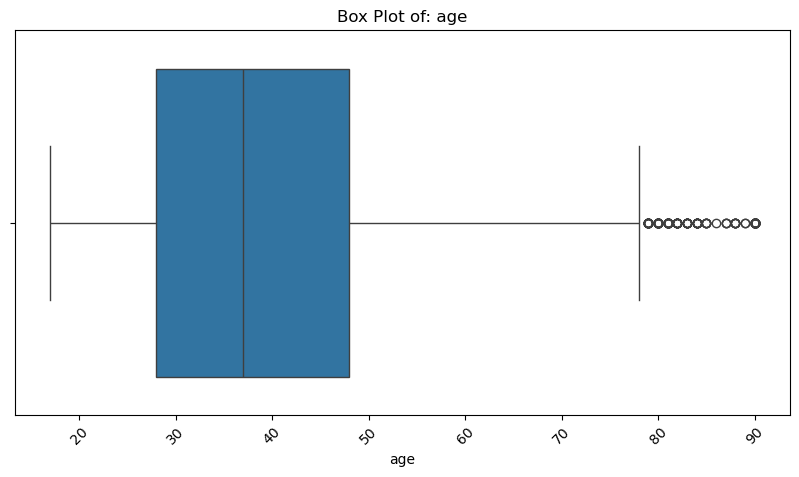

Descriptive stats for: fnlwgt 
 count    4.884200e+04
mean     1.896641e+05
std      1.056040e+05
min      1.228500e+04
25%      1.175505e+05
50%      1.781445e+05
75%      2.376420e+05
max      1.490400e+06
Name: fnlwgt, dtype: float64


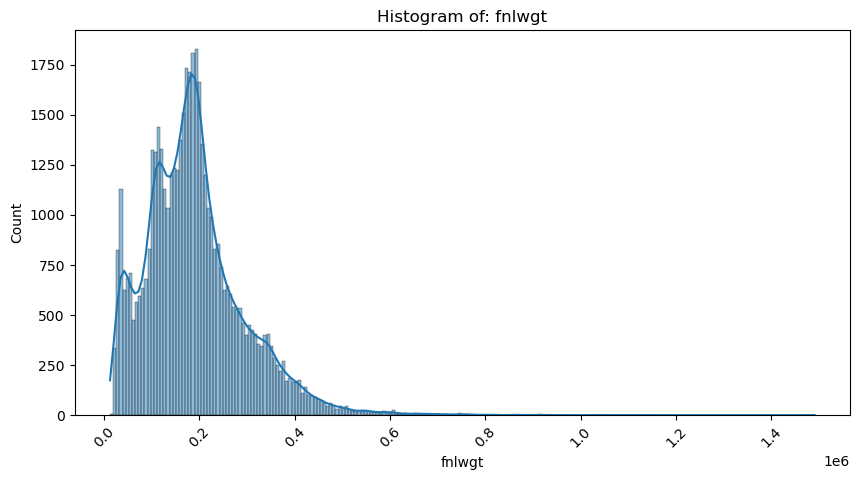

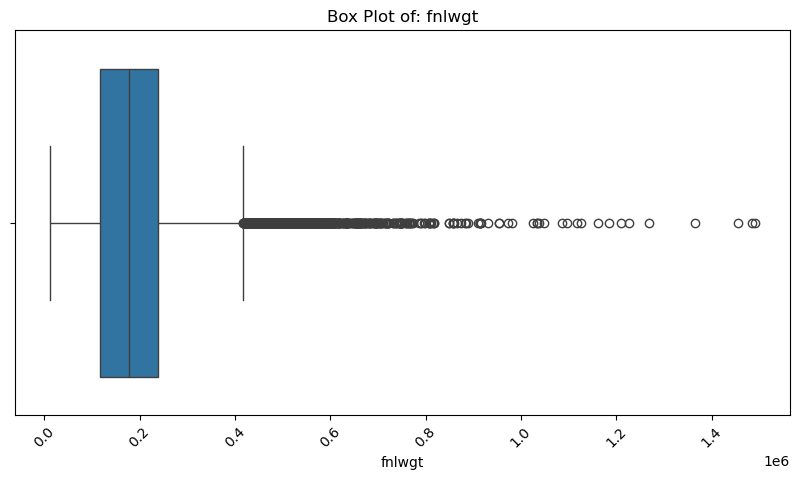

Descriptive stats for: education-num 
 count    48842.000000
mean        10.078089
std          2.570973
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: education-num, dtype: float64


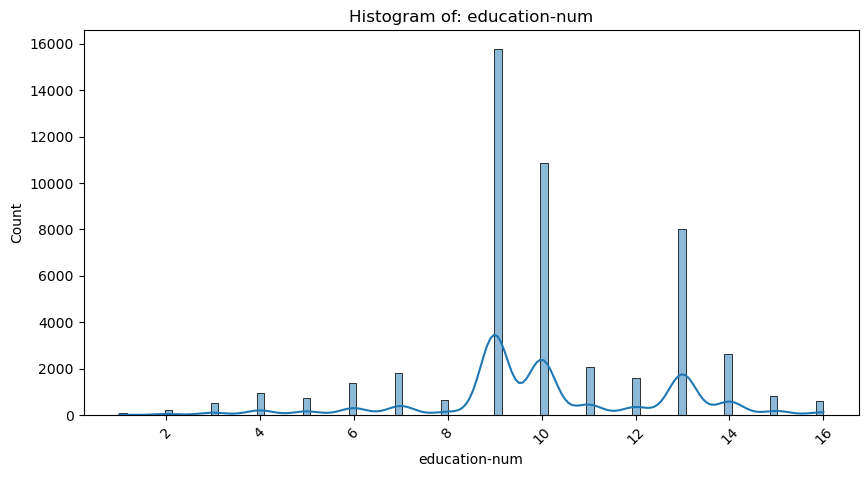

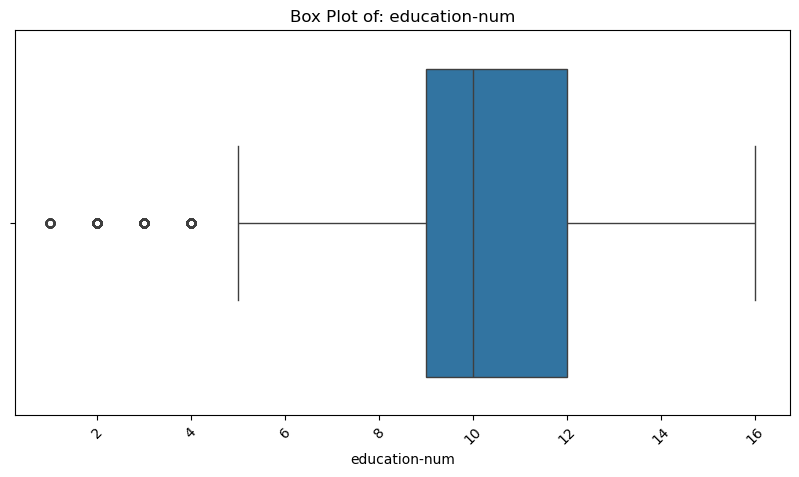

Descriptive stats for: capital-gain 
 count    48842.000000
mean      1079.067626
std       7452.019058
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64


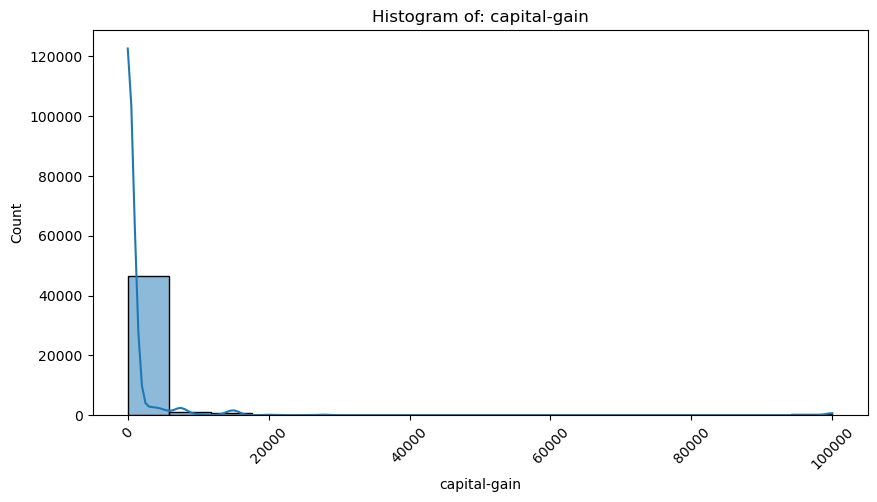

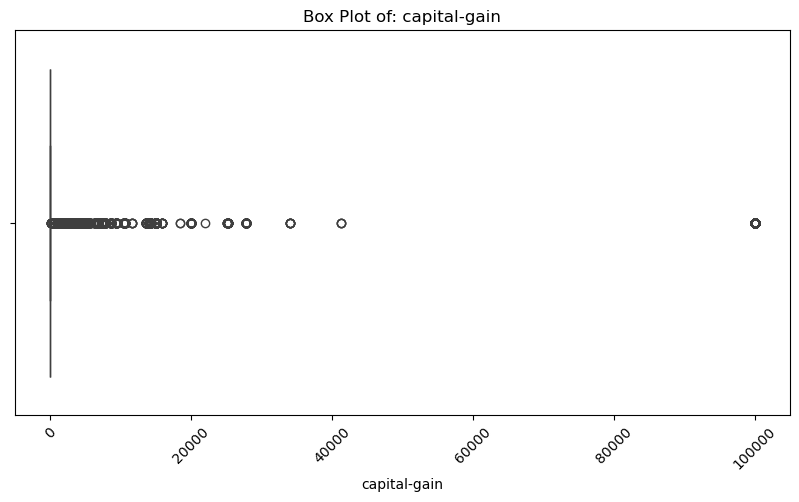

Descriptive stats for: capital-loss 
 count    48842.000000
mean        87.502314
std        403.004552
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital-loss, dtype: float64


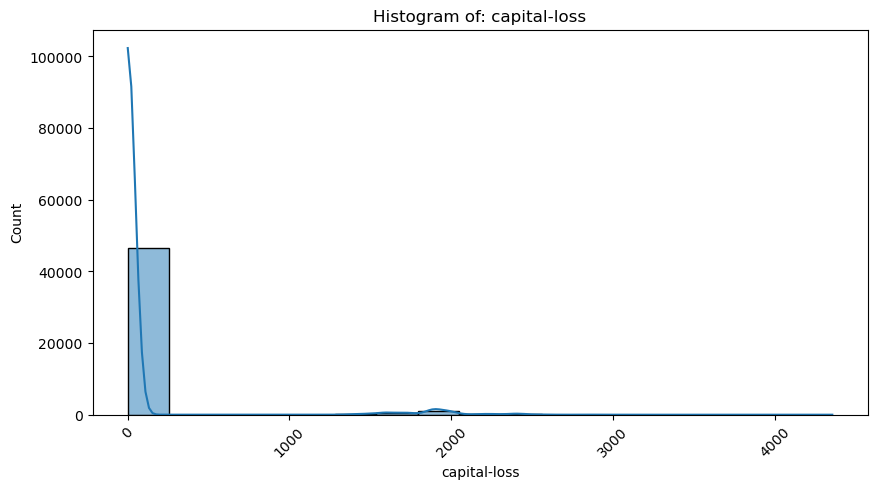

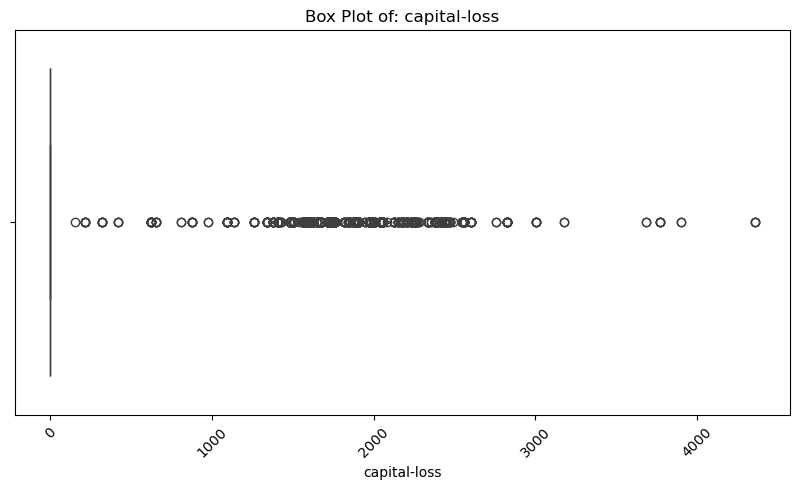

Descriptive stats for: hours-per-week 
 count    48842.000000
mean        40.422382
std         12.391444
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64


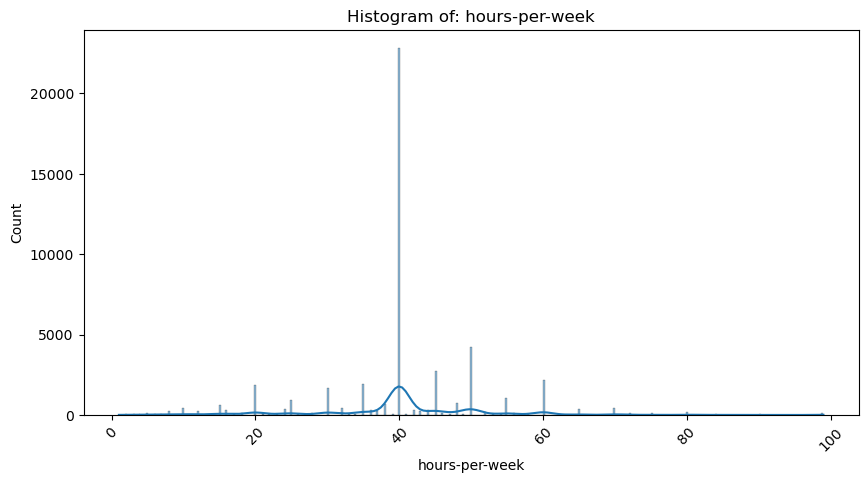

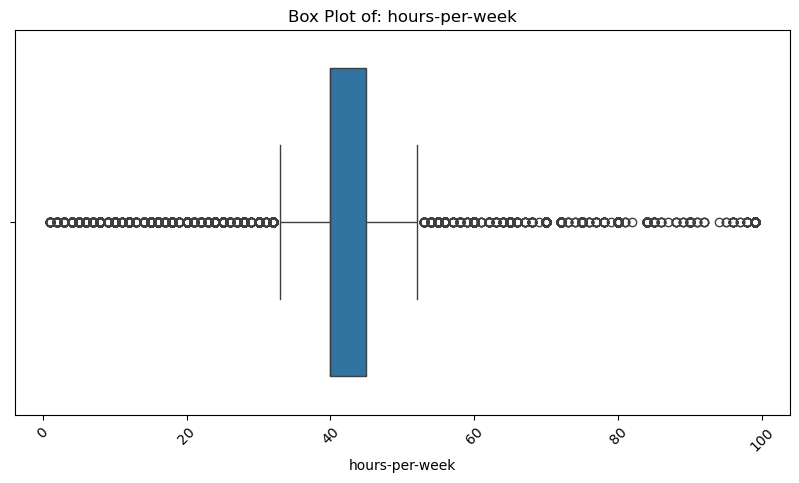

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

Mode: Private



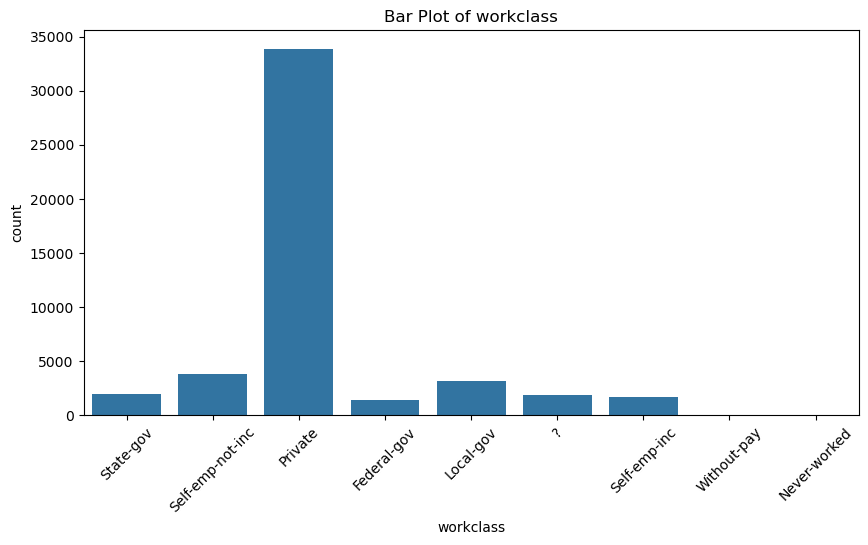

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

Mode: HS-grad



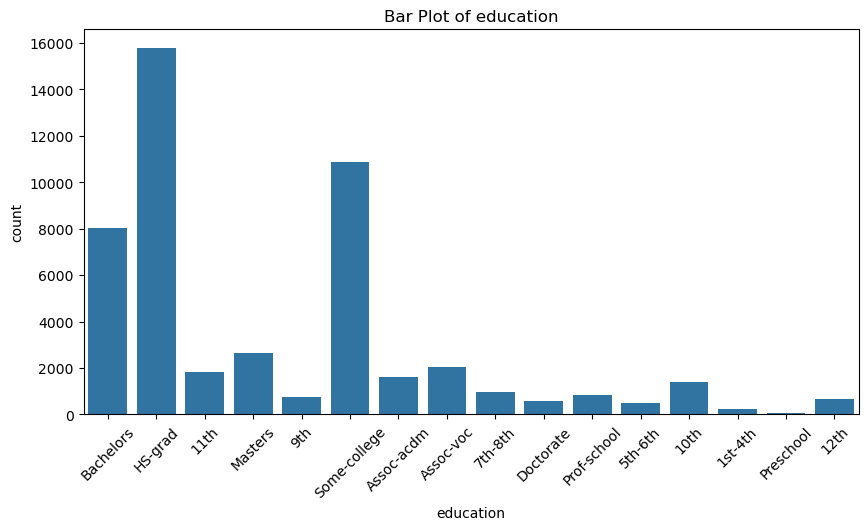

marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64

Mode: Married-civ-spouse



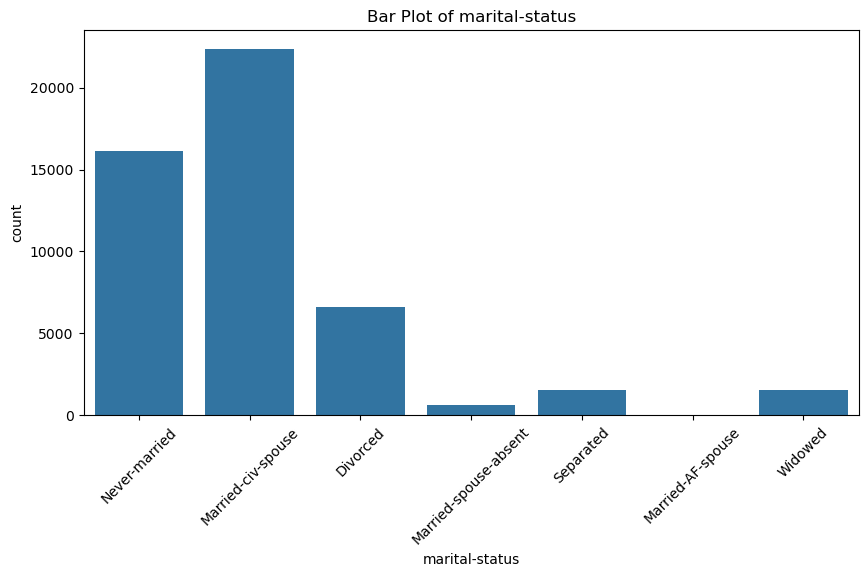

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
?                    1843
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

Mode: Prof-specialty



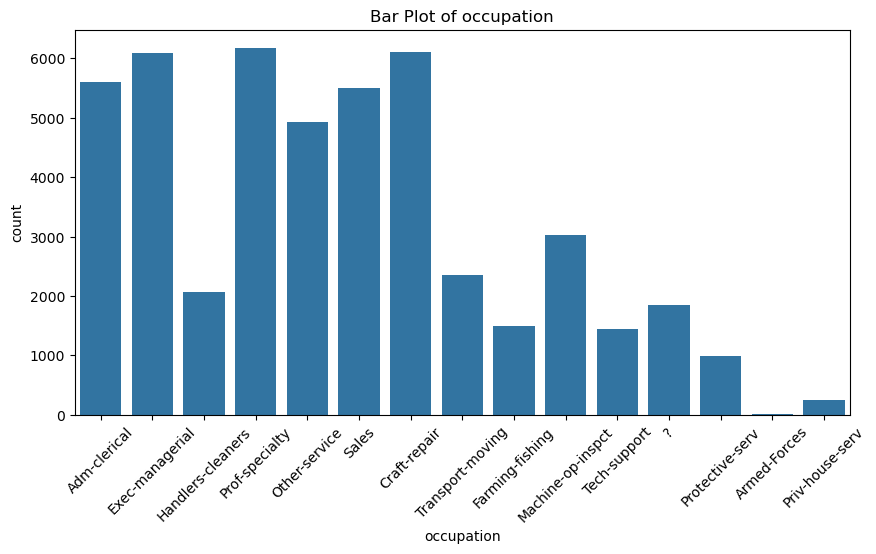

relationship
Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: count, dtype: int64

Mode: Husband



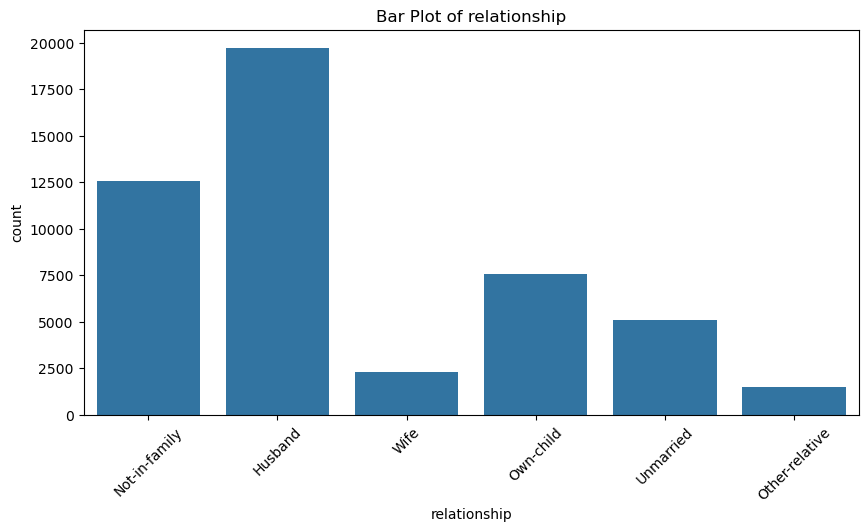

race
White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: count, dtype: int64

Mode: White



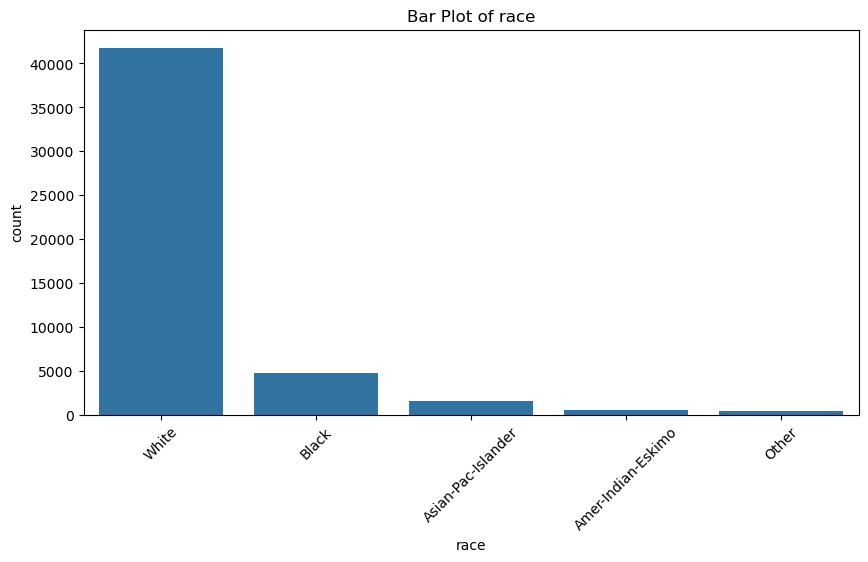

sex
Male      32650
Female    16192
Name: count, dtype: int64

Mode: Male



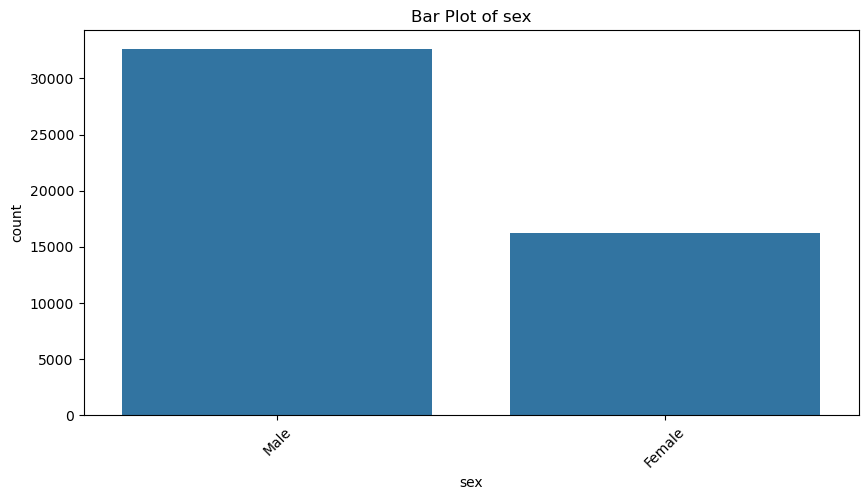

native-country
United-States                 43832
Mexico                          951
?                               583
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru         

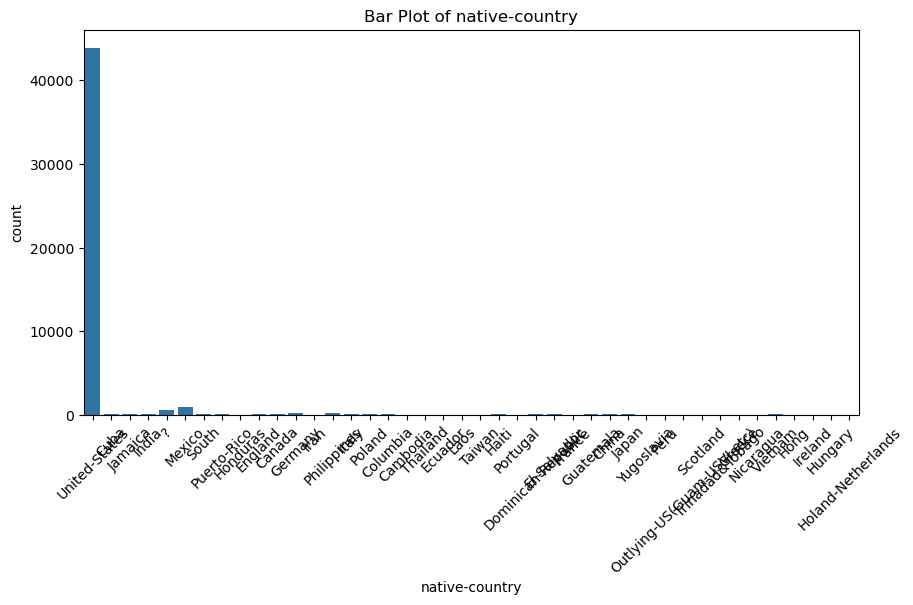

income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64

Mode: <=50K



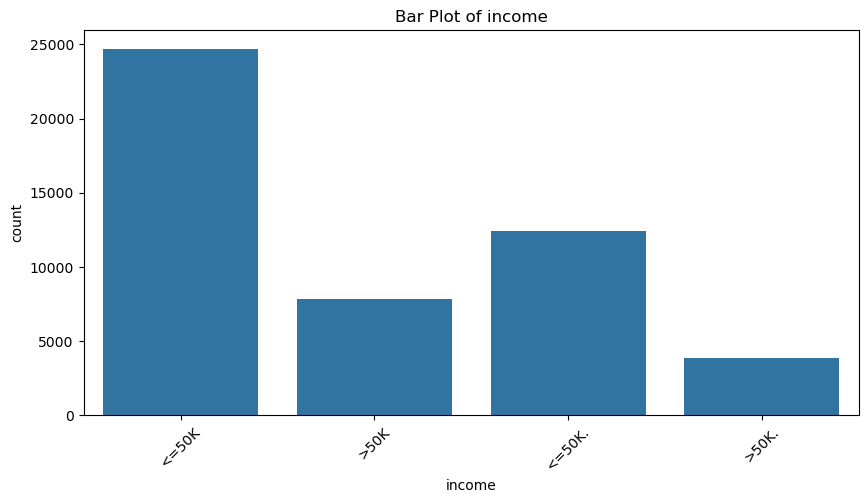

In [3]:

for col in num_col:
    run_numerical_descriptive_stats(col)
    plt.figure(figsize=(10, 5))
    sns.histplot(data=adult, x=col, kde=True)
    plt.title(f'Histogram of: {col}')
    plt.xticks(rotation=45)
    plt.show()

    plt.figure(figsize=(10, 5))
    sns.boxplot(data=adult, x=col)
    plt.title(f'Box Plot of: {col}')
    plt.xticks(rotation=45)
    plt.show()

for col in cat_col:
    run_categorical_descriptive_stats(col)
    plt.figure(figsize=(10, 5))
    sns.countplot(data=adult, x=col)
    plt.title(f'Bar Plot of {col}')
    plt.xticks(rotation=45)
    plt.show()

# Pair analysis
Let's get an overview of our numerical variables and their cor-relationships.
Looking through the heatmap below, its visible there is mostly no strong postive/negative correlation between any of the numerical variables.

Displayed are the correlation coeffcients, ranging from -0.077 to 0.14.

Note this plot only displays the lack of strong linear correlations, this does not exclude any non-linear relationships.

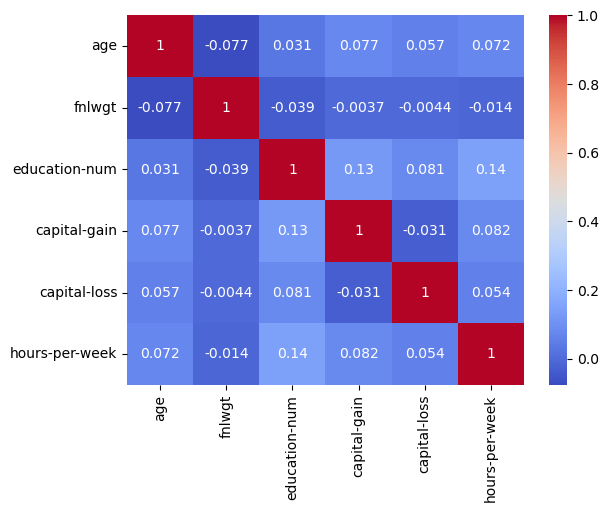

In [4]:
adult_only_num =  adult[num_col]
correlation_matrix = adult_only_num.corr()
correlation_matrix

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

## Numeric vs. Numeric: education-num vs. age
Since it doesn't really matter which of these we further analyse we pick two at random.

We perfrom a correlation analysis between education-num and age , the result was a **very** weak positive linear correlation. 
This means that age does not strongly influence the education level, and vice versa. 

However there is an indication of a small increase in age as education level increases. but very very weak and almost insignificant.

Below a violin plot shows the spread of ages within education numbers. 

Correlation between Age and Education Level: 0.03094037587451357


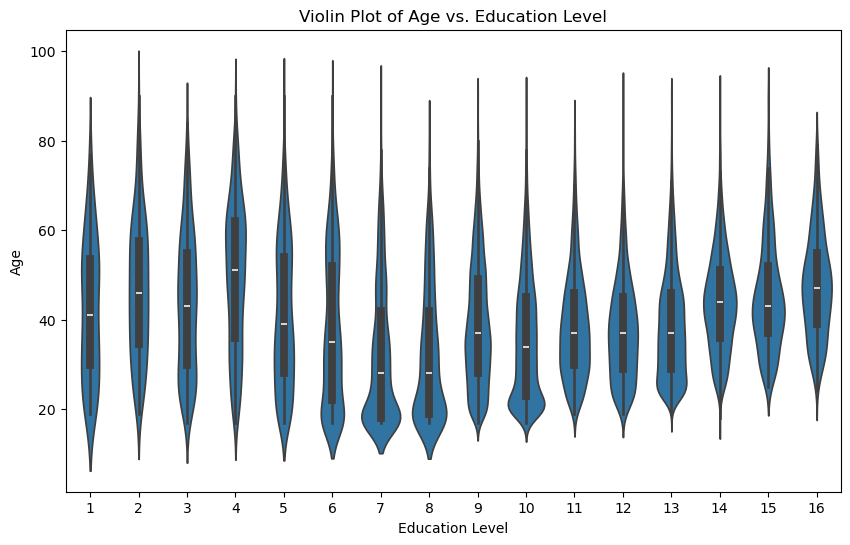

In [5]:
age_ed_corr = adult.copy()
age_ed_corr['income'] = age_ed_corr['income'].map({'<=50K': 0, '>50K': 1})

# Correlation coefficient be
age_variance = age_ed_corr['age'].var()
education_variance = age_ed_corr['education-num'].var()
correlation = age_ed_corr['age'].corr(age_ed_corr['education-num'])


print(f"Correlation between Age and Education Level: {correlation}")

plt.figure(figsize=(10, 6))
sns.violinplot(x='education-num', y='age', data=age_ed_corr)
plt.xlabel('Education Level')
plt.ylabel('Age')
plt.title('Violin Plot of Age vs. Education Level')
plt.show()

## Categorical vs. Categorical: sex vs. income (normalized)
remember: There are more men, than women in our dataset. This view is just normalized so we dont get the influence of our skewed amount     of women and men.

Our stacked bar plot displays the following:
Men are more likely to earn less than 50K compared to women.
Women are more likely to earn 50K or more, than men are. 

We perform a correlation analysis to see if there is a correlation between income and gender. We find that there is a weak negative correlation (-0.215).

This indicates a slight inverse relationship, meaning that as the proportion of one category (women earning >50K) increases, the proportion of the other category (e.g., men earning <=50K) tends to decrease slightly. 
The relationship is weak, suggesting being male/female have little significance on earnings.


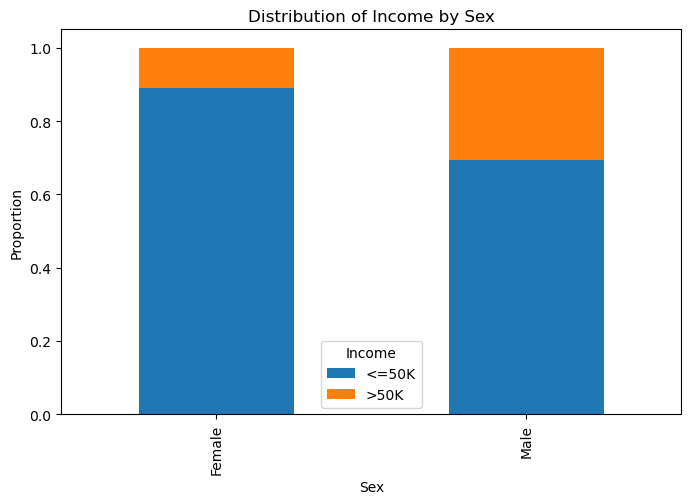

Correlation: -0.21532540551045778


In [6]:
#making a copy, to not pollute the O.G dataset
incomeXsex = adult.copy()

#fixing up the errors in income
incomeXsex = incomeXsex.replace({"<=50K." : "<=50K", ">50K.": ">50K" })

#removing anything containing N/A values
incomeXsex = incomeXsex.dropna()

#unsure if there are any other issues, but we roll with this for now

sex_income_ct = pd.crosstab(incomeXsex['sex'], incomeXsex['income'], normalize='index')

# Stacked bar plot
sex_income_ct.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('Distribution of Income by Sex')
plt.xlabel('Sex')
plt.ylabel('Proportion')
plt.legend(title='Income')
plt.show()


#Converting both sex/adult into numeric variables to get the corr
incomeXsex['income'] = incomeXsex['income'].map({'<=50K': 0, '>50K': 1})
incomeXsex['sex'] = incomeXsex['sex'].map({'Male': 0, 'Female': 1})
print(f'Correlation: {incomeXsex['sex'].corr(incomeXsex['income'])}')


## Categoric vs. Numeric: income vs. age

Interesting takeaway here:
* For the income level of <=50K the median age is around 37 years.
* For >50K The median age is slightly higher, around 42 years.
* meanwhile the mean for the whole age is closer to 38,6 years - displaying that the mean is being pulled up, but not so much by the individuals earning >50K. When we print out the count of people earning that amount we can see that there is significantly less people earning  >50K than there are earning 50K or more. The disparity is around 1:3. 
(this was confirmed for us earlier, but we pretend we were led to this discovery for effect.)



Income stats:
count     48842
unique        2
top       <=50K
freq      37155
Name: income, dtype: object

Age stats:
count    48842.000000
mean        38.643585
std         13.710510
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64


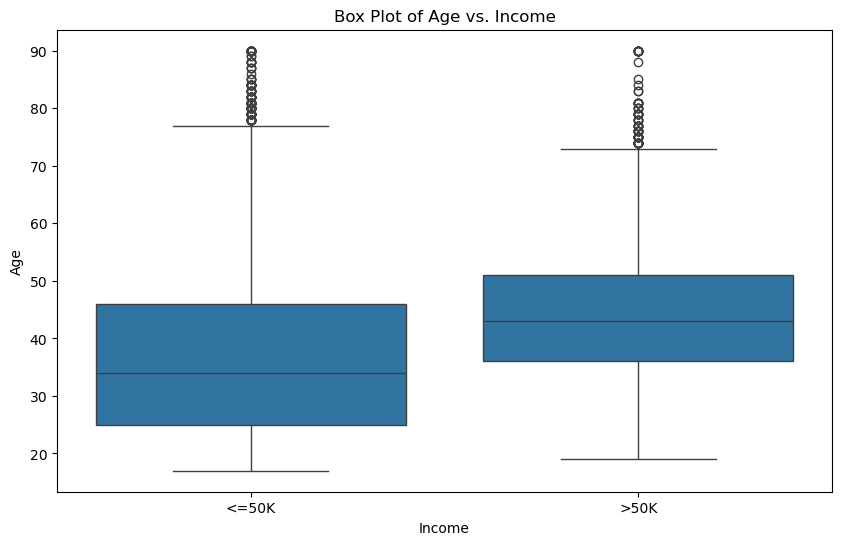

Correlation between Income and Age: 0.23036946784751394


In [7]:
#consolidating the duplicate categories
cleaned_df = adult.replace({"<=50K." : "<=50K", ">50K.": ">50K" })

#doing summarization of central tendencies in both 
income_stats = cleaned_df['income'].describe()
age_stats = cleaned_df['age'].describe()

print("Income stats:")
print(income_stats)
print("\nAge stats:")
print(age_stats)


# plotting boxplot to visualize the distribution of age for each income level
plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='age', data=cleaned_df)
plt.xlabel('Income')
plt.ylabel('Age')
plt.title('Box Plot of Age vs. Income')
plt.show()



#Mapping income to 0 and 1
cleaned_df['income'] = cleaned_df['income'].map({'<=50K': 0, '>50K': 1})

correlation = cleaned_df['income'].corr(cleaned_df['age'])
print(f"Correlation between Income and Age: {correlation}")



In [18]:
povos = adult[adult['income'] == '<=50K']

richies= adult[adult['income'] == '>50K']
print(f' Count of how many earn less than 50k: {povos.shape[0]}')
print(f'Count of how many earn more than 50k: {richies.shape[0]}')


 Count of how many earn less than 50k: 24720
Count of how many earn more than 50k: 7841


# Everything below is just extra data processing, or investigative work. 

# Workclass
After a bit of processing to remove the N/A and ? values (which really didn't change much), we can see workclass is highly skewed. <br>
Large concentration of people working in private sector (~33000). <br>
This is so high that we barely can see how few are classified as `Without-pay` and `Never-worked`.<br>
<br>
The variance is high since the counts differ for each category.


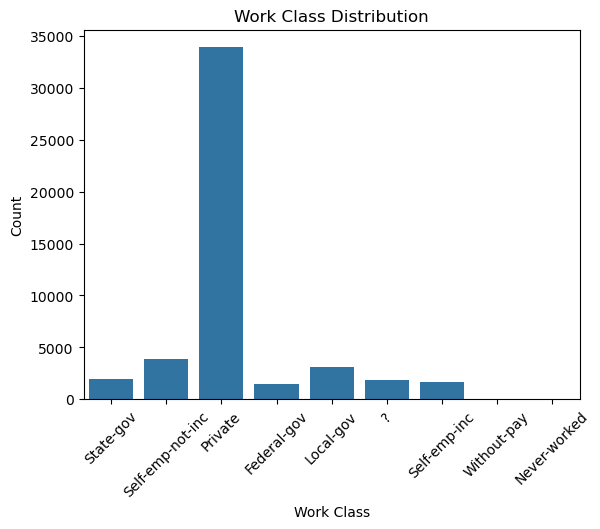

In [19]:

sns.countplot(data=adult, x='workclass')
plt.title('Work Class Distribution')
plt.xlabel('Work Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

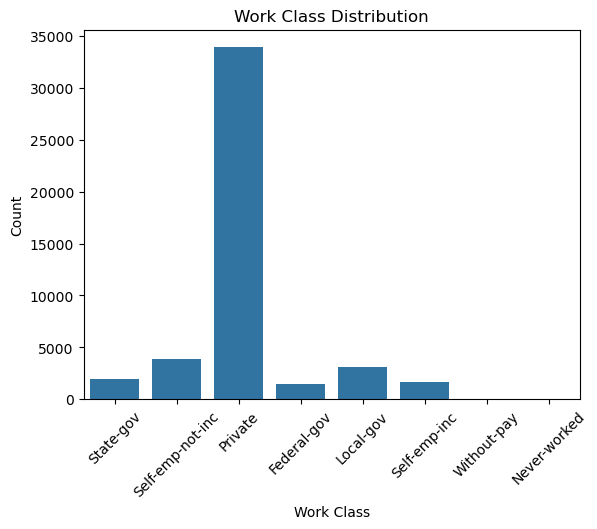

In [20]:
#drop the ones labeled '?' and the N/A values we learned we have in this column
adult = adult[adult['workclass'] != '?']
adult = adult.dropna(subset=['workclass'])

#plotting out the cleaned workclass
sns.countplot(data=adult, x='workclass')
plt.title('Work Class Distribution')
plt.xlabel('Work Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [21]:
# mean_frequency
mean_frequency = adult['workclass'].value_counts().mean()

#variance of the frequencies
variance = adult['workclass'].value_counts().var()

print(f"Mean Frequency: {mean_frequency}")
print(f"Variance: {variance}")

Mean Frequency: 5755.375
Variance: 131174313.69642857


# Education


cols = ["education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]

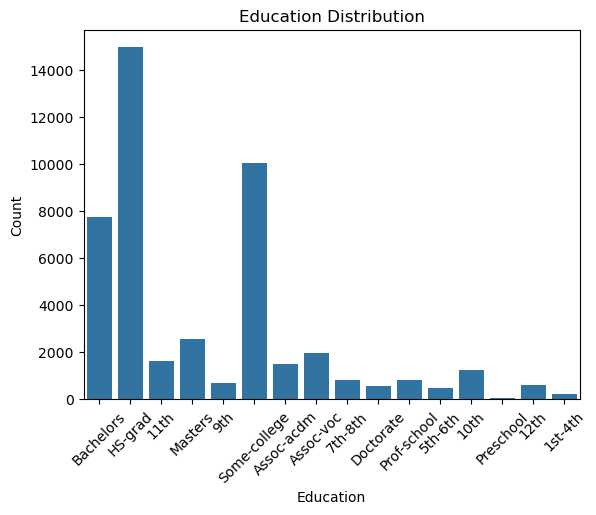

In [22]:
sns.countplot(data=adult, x='education')
plt.title('Education Distribution')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [23]:
# mean_frequency
mean_frequency = adult['education'].value_counts().mean()

#variance of the frequencies
variance = adult['education'].value_counts().var()

print(f"Mean Frequency: {mean_frequency}")
print(f"Variance: {variance}")

Mean Frequency: 2877.6875
Variance: 18191111.029166665


### Checking for N/A values
Our visualization shows that there is N/A values in the DF specifically in `workclass`, `occupation` and `native-country`.
The section below displays the amount of the N/A values, and subsequently drops it.


In [24]:
#count the true and false for each column containing n/A
wc = adult["workclass"].isna().value_counts()
oc = adult["occupation"].isna().value_counts()
nc = adult["native-country"].isna().value_counts()

print(wc, "\n")
print(oc, "\n")
print(nc, "\n")

workclass
False    46043
Name: count, dtype: int64 

occupation
False    46040
True         3
Name: count, dtype: int64 

native-country
False    45788
True       255
Name: count, dtype: int64 



In [ ]:
# dropping rows containing N/A values 
adult = adult.dropna()

### Identifiying errors in the data
The line `adult['income'].value_counts()` displays how the `income` column is measured in two different ways which can be combined into two categories


In [ ]:
adult['income'].value_counts()

In [ ]:
# Combining the categories into two
adult = adult.replace({"<=50K." : "<=50K", ">50K.": ">50K" })
adult['income'].value_counts()

In [ ]:
#There are records where the value in columns occupations and  work is meerly "?".
# removing these
adult = adult[adult.apply(lambda row: '?' in row.values, axis=1)]